In [79]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv(r"loan.csv")

# Function Transformer

In [81]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: ylabel='Density'>

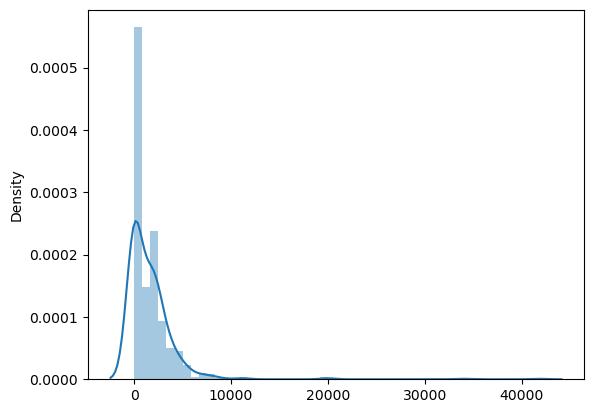

In [82]:
sns.distplot(x = df["CoapplicantIncome"])

In [83]:
# q1 = df["CoapplicantIncome"].quantile(0.25)
# q3 = df["CoapplicantIncome"].quantile(0.75)
# iqr = q3-q1
# min_value = q1-(1.5*iqr)
# max_value = q3+(1.5*iqr)

# df = df[df["CoapplicantIncome"]<=max_value]

In [84]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


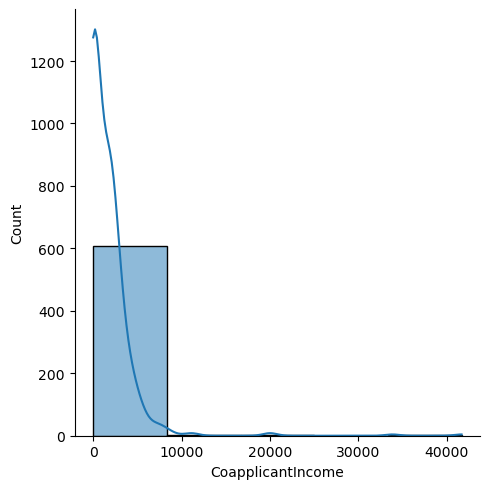

In [85]:
sns.displot(x = df["CoapplicantIncome"],kde = True,bins = 5)

In [86]:
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(func = np.log1p)

In [87]:
df.loc[:,"function_Transformerco"] = ft.fit_transform(df[["CoapplicantIncome"]])

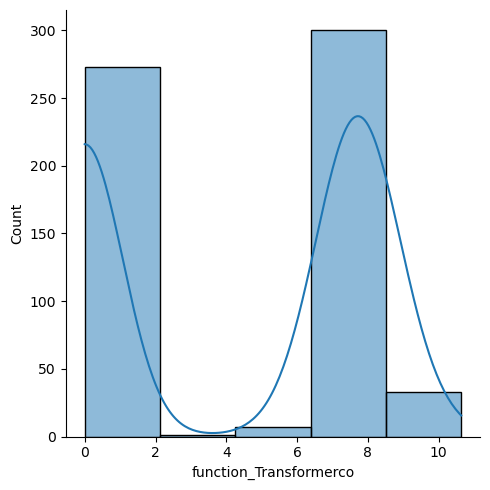

In [88]:
sns.displot(data=df, x="function_Transformerco", bins=5, kde=True)

## now we can have the look how data is distributed over the graph for the better understanding

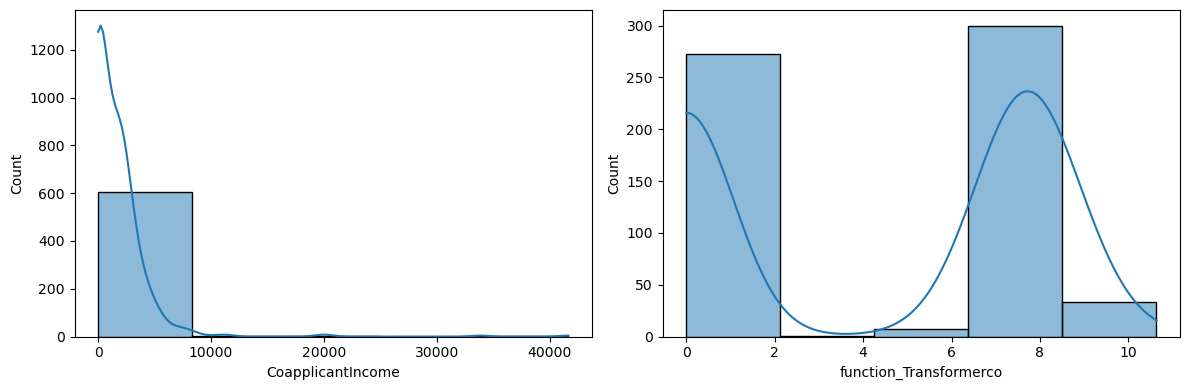

In [89]:

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.histplot(x = df["CoapplicantIncome"],kde = True,bins = 5)

plt.subplot(1,2,2)
sns.histplot(data=df, x="function_Transformerco", bins=5, kde=True)

plt.tight_layout()

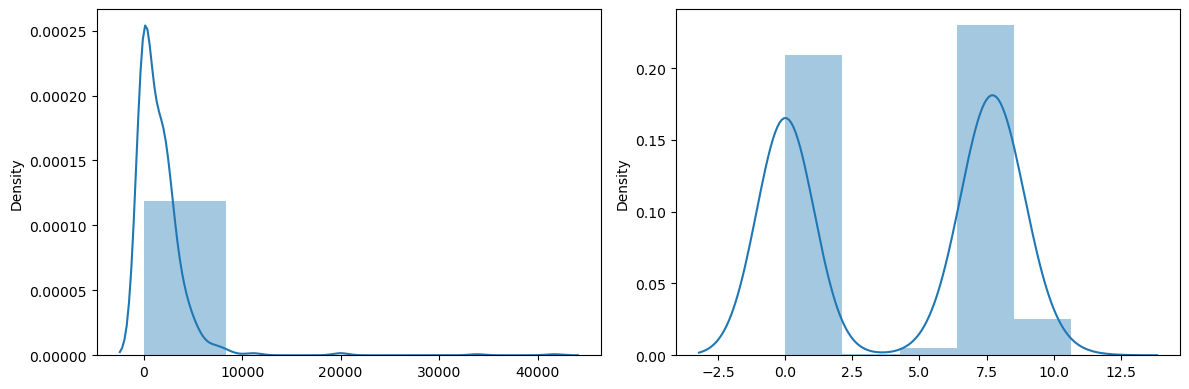

In [90]:
import warnings as w
w.filterwarnings("ignore")

# here distplot is old and deprecated so it will give the warning so we have use the warnings module 
# so that it will filter the warning 

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(x = df["CoapplicantIncome"],kde = True,bins = 5)

plt.subplot(1,2,2)
sns.distplot(x=df["function_Transformerco"], bins=5, kde=True)

plt.tight_layout()
plt.show()